In [3]:
#!tar -xf Damage_Net/DAmageNet_900_999.tar

In [4]:
# %history -g         #it's very important to retrive the history or use $sqlite3 history.sqlite 

In [1]:
from torchvision import models
import torch

C:\Users\mo894398\Anaconda3\envs\pytourch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# you don't have to run it
import glob
path = "C:/Users/mo894398/Desktop/dataset/Damage_Net/*/*/*"
img_path=glob.glob(path)


In [3]:
# you don't have to run it
path=os.path.normpath(img_path[0])
pathSplit= path.split(os.sep)
label= 1 if pathSplit[-3] == 'DAmageNet' else 0

NameError: name 'os' is not defined

In [2]:
# you don't have to run it
from PIL import Image
from torchvision import transforms
from torch.utils.data import (
    Dataset,
    DataLoader,
)
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

transform = transforms.Compose([
                 #transforms.Resize(256),
                 #transforms.CenterCrop(224),
                 transforms.ToTensor(),
                 #transforms.Normalize(
                 #mean=[0.485, 0.456, 0.406],
                 #std=[0.229, 0.224, 0.225]
                 #)
                ])

class ReadImage(Dataset):
    """Image dataset."""

    def __init__(self, img_dir, transform=True):
        """
        Args:
            matfile_dir (string): Path to .mat file that contains the metadata of the imagesd
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.img_dir=img_dir
        self.transform=transform
        
    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
    
        img_path = self.img_dir[idx]
        path=os.path.normpath(img_path)
        pathSplit= path.split(os.sep)
        
        label= "adversarial" if pathSplit[-3] == 'DAmageNet' else "clean"

        image=Image.open(img_path)
        #image = io.imread(img_name)
        if self.transform:
            image = self.transform(image)
        
        return image,label



In [211]:
# you don't have to run it
test=ReadImage(img_path,transform=transform)

num_train = len(test)
indices = list(range(num_train))
#split = int(np.floor(0.2 * num_train))
#np.random.shuffle(indices)
from torch.utils.data.sampler import SubsetRandomSampler
#train_idx, test_idx = indices[split:], indices[:split]
test_idx=indices
#train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

#trainloader = torch.utils.data.DataLoader(train_data,
#               sampler=train_sampler, batch_size=b_size)
testloader = torch.utils.data.DataLoader(test,
               sampler=test_sampler, batch_size=b_size, drop_last= True) 
                #batch_size=b_size)


In [3]:
# @@ Cell 337
image_size=224
b_size=32
path = "C:/Users/mo894398/Desktop/dataset/Damage_Net/"
class ImageLoadDataset_test(Dataset):
    """Image dataset."""

    def __init__(self, root_dir, transform=True):
        """
        Args:
            matfile_dir (string): Path to .mat file that contains the metadata of the imagesd
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_dir1=glob.glob(root_dir+os.listdir(root_dir)[0]+'/*/*')
        print (len(self.data_dir1))
        self.data_dir2=glob.glob(root_dir+os.listdir(root_dir)[1]+'/*/*')
        print (len(self.data_dir2))
        self.transform = transform

    def __len__(self):
        return len(self.data_dir1)

    def __getitem__(self, idx):
        
        img1,img2 = self.data_dir1[idx],self.data_dir2[idx]
        with open(img1, 'rb') as f:
            img = Image.open(f)
            image1=img.convert('RGB')
            
        path=os.path.normpath(self.data_dir1[idx])
        pathSplit= path.split(os.sep)
        
        label1= "adversarial" if pathSplit[-3] == 'DAmageNet' else "clean"
        imgClass1= pathSplit[-2]
        
        with open(img2, 'rb') as f1:
            img = Image.open(f1)
            image2=img.convert('RGB')        ## Prepare labels
        
        path=os.path.normpath(self.data_dir2[idx])
        pathSplit= path.split(os.sep)
        
        label2= "adversarial" if pathSplit[-3] == 'DAmageNet' else "clean"
        imgClass2= pathSplit[-2]
        
        if self.transform:
            image1 = self.transform(image1)
            image2= self.transform(image2)
        return image1,label1, int(imgClass1), image2,label2, int(imgClass2)

In [4]:
# @@ Cell 338
test=ImageLoadDataset_test(path,transform=transform)
train=ImageLoadDataset_test(path,transform=transform)

num_train = len(train)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train))
np.random.shuffle(indices)
from torch.utils.data.sampler import SubsetRandomSampler
train_idx, test_idx = indices[split:], indices[:split]
#test_idx=indices
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

trainloader = torch.utils.data.DataLoader(train,
               sampler=train_sampler, batch_size=b_size)

testloader = torch.utils.data.DataLoader(test,
               sampler=test_sampler, batch_size=b_size, drop_last= True)
                #batch_size=b_size)

96020
96020
96020
96020


0


AssertionError: 

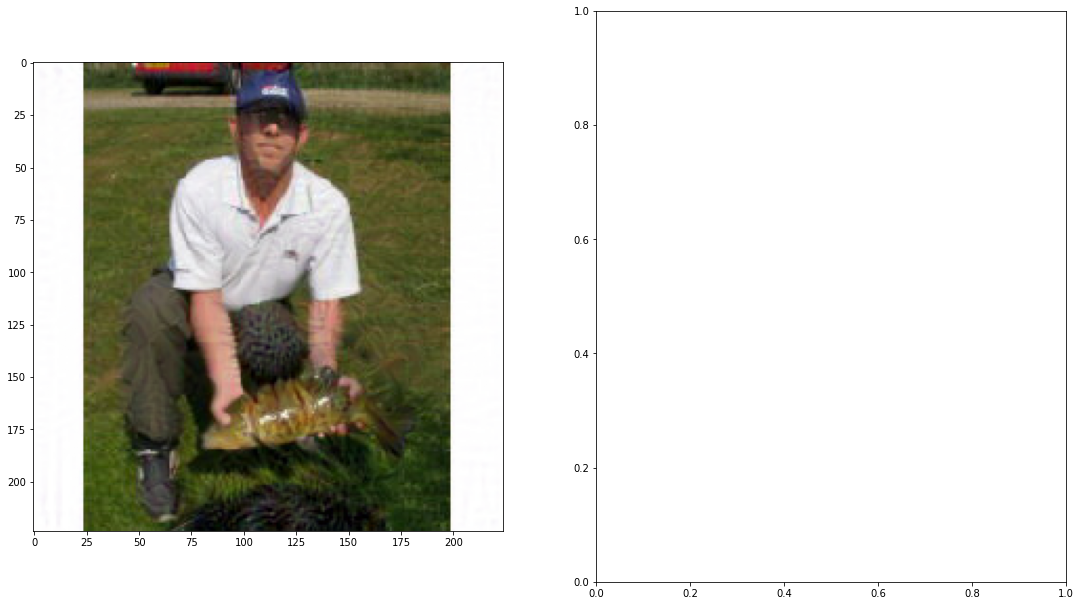

In [5]:
for i in test:
    f, axarr = plt.subplots(1,2)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    print(i[2]) # or 1
    axarr[0].imshow(i[0].detach().cpu().permute(1,2,0))
    assert False

In [6]:
from torch import nn

In [41]:
#alexnet = models.alexnet(weights=True)
#resnet18 = models.resnet18(weights=True)
resnet50 = models.resnet152(weights=True)
#inception= models.inception_v3(weights=True)

C:\Users\mo894398\Anaconda3\envs\pytourch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to C:\Users\mo894398/.cache\torch\hub\checkpoints\resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:28<00:00, 8.54MB/s] 


In [119]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x
    
#resnet18.fc=Identity()
resnet50.fc=Identity()
inception.fc=Identity()

In [42]:
#resnet18.eval()
#inception.cuda().eval()
resnet50.cuda().eval()
#alexnet.cuda().eval

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
from torchvision.utils import save_image

In [69]:
alexnet.cpu()

alexnet= models.alexnet(weights=True)

alexnet.eval()




C:\Users\mo894398\Anaconda3\envs\pytourch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [20]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [47]:
clean_list = []
adv_list = []

l2norm= nn.MSELoss(reduction= "none")

with torch.no_grad():
    for i,(img1,label1,imgClass1,img2,label2,imgClass2) in enumerate(trainloader):

        #img1 --> adversarial
        #img2 --> clean
        
        embedding1 = resnet50(img2.to("cuda"))
        embedding2 = alexnet(img2.to("cuda"))
        embedding3 = resnet50(img1.to("cuda"))
        embedding4 = alexnet(img1.to("cuda"))
        
        prob_class1 = torch.topk(torch.softmax(embedding1,1),1)
        prob_class2 = torch.topk(torch.softmax(embedding2,1),1)
        prob_class3 = torch.topk(torch.softmax(embedding3,1),1)
        prob_class4 = torch.topk(torch.softmax(embedding4,1),1)
        
        for x, y, z, w in zip(prob_class1[1], prob_class2[1], prob_class3[1], prob_class4[1]):
            clean_list.append(len(intersection(x.tolist(), y.tolist())))
            adv_list.append(len(intersection(z.tolist(), w.tolist())))
        
        #clean_sum = sum(clean_list)
        #adv_sum = sum(adv_list)
        #print(clean_list)
        #print(adv_list)
        #a = [intersection(prob_class1[1].tolist(), prob_class2[1].tolist())]
        
        #print(clean_sum)
        #print(adv_sum)
        #right_classes = torch.tensor(imgClass2)
        #clean_list.append([prob_class1[1], prob_class2[1]])
        #adv_list.append([prob_class3[1], prob_class4[1]])
        
        
        #assert False


In [56]:
clean_sum = sum(clean_list)
adv_sum = sum(adv_list)
print(clean_sum)
print(adv_sum)

9385
8825


In [53]:
print(adv_list)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 

In [43]:
clean_list = []
adv_list = []

l2norm= nn.MSELoss(reduction= "none")

with torch.no_grad():
    for i,(img1,label1,imgClass1,img2,label2,imgClass2) in enumerate(trainloader):

        #img1 --> adversarial
        #img2 --> clean
        
        embedding1 = inception(img2.to("cuda"))
        embedding2 = alexnet(img2.to("cuda"))
        embedding3 = inception(img1.to("cuda"))
        embedding4 = alexnet(img1.to("cuda"))

        prob_class1 = torch.topk(torch.softmax(embedding1,1),1)
        prob_class2 = torch.topk(torch.softmax(embedding2,1),1)
        prob_class3 = torch.topk(torch.softmax(embedding3,1),1)
        prob_class4 = torch.topk(torch.softmax(embedding4,1),1)
        
        right_classes = torch.tensor(imgClass2)
        
        ind = torch.arange(0,prob_class1[1].shape[0]).unsqueeze(1)
        
        right_index = ind[prob_class1[1]==right_classes.unsqueeze(1).to("cuda")]

        dis_clean = l2norm(prob_class1[0][right_index].cuda(),
                           prob_class2[0][right_index].cuda())
        dis_adv = l2norm(prob_class3[0][right_index].cuda(),
                         prob_class4[0][right_index].cuda())
      
        
        for x1, x2 in zip(dis_clean, dis_adv):
            clean_list.append(float(x1))
            adv_list.append(float(x2))

C:\Users\mo894398\AppData\Local\Temp\ipykernel_9408\3416449924.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  right_classes = torch.tensor(imgClass2)


In [353]:
proposed_list = []
right_list_f = []
adv_list_f = []
proposed_list_f = []
with torch.no_grad():
    for i,(img1,label1,imgClass1,img2,label2,imgClass2) in enumerate(trainloader):

        org_img=inception(img2.to("cpu"))
        adv_img=inception(img1.to("cpu"))
        #print("the predection of the model")
        #print(torch.topk(torch.softmax(embedding3,1),1)[1].t())
        #print("label")
        #print(imgClass2)
        #print ("------------------------")
        right_probability = torch.topk(torch.softmax(org_img,1),1)[1]
        adv_probability = torch.topk(torch.softmax(adv_img,1),1)[1]
        #classes = torch.topk(torch.softmax(embedding3,1),1)[1]
        prob_ = torch.softmax(adv_img,1)
        #print((torch.topk(prob_,1)[1]).t())
        print(torch.topk(prob_,1)[0].t())
        for j in range(adv_probability.shape[0]):
            #print(prob_[j,classes[j]])
        
            #print(prob_[j, adv_probability[j]])
            #print(prob_[0,200])
            prob_[j, adv_probability[j]] /= 2109.579277291896 #34559.096527504815 2109.579277291896
            #prob_[j,classes[j]] /= 34559.096527504815
            proposed_list = torch.topk(prob_,1)[1]
            #print(adv_probability.t())
            print(right_probability.t())
            print(proposed_list.t())
            #print(adv_probability.t())
            assert False
            #correct_list = torch.topk(torch.softmax(embedding3_,1),1)[1]
        #print("the predection of the model")
        #print(torch.topk(prob_,1)[1].t())
        #prpation_list.append(torch.topk(prob_,1)[1])
        #correct_list.append(torch.topk(torch.softmax(embedding3_,1),1)[1])
        

        #assert False
        for x1, x2, x3 in zip(right_probability, adv_probability, proposed_list):
            right_list_f.append(float(x1))
            adv_list_f.append(float(x2))
            proposed_list_f.append(float(x3))
            
  

tensor([[0.9160, 0.6740, 0.9974, 0.5016, 0.5887, 0.9274, 0.9031, 0.5749, 0.3286,
         0.8950, 0.3800, 0.8369, 0.9845, 0.3664, 0.8197, 0.4886, 0.5154, 0.6667,
         0.9999, 0.9554, 0.4272, 1.0000, 0.9434, 0.8510, 0.6497, 0.8239, 0.7389,
         0.9998, 0.9863, 0.6059, 0.9768, 0.6618]])
tensor([[  7, 811, 734, 737, 377, 927,  69, 639, 483, 922, 969,  95, 169,  98,
         945, 955, 611, 124, 274, 166, 349,  79, 383, 388, 606,  73, 372, 368,
          62, 385, 125, 955]])
tensor([[  7, 588, 407, 737, 377, 927,  69, 838, 980, 922, 971,  94, 169, 136,
         945, 956, 611, 311, 274, 215, 178,  79, 105, 299, 606,  73, 374, 368,
          62, 296, 125, 109]])


AssertionError: 

In [268]:
correct_list_f_18oct = correct_list_f
prpation_list_f_18oct = prpation_list_f
print(len(correct_list_f_18oct))
print(len(prpation_list_f_18oct))

76816
76816


In [257]:
clean_list=[]
adv_list=[]

l2norm= nn.MSELoss(reduction= "none")

#def map_L2I (dis,label):
#    return [dis,label]

#start = time.process_time()
with torch.no_grad():
    for i,(img,label) in enumerate(testloader):

        #embedding1=resnet18(img.to("cpu"))
        embedding2=alexnet(img.to("cuda"))
        embedding3=inception(img.to("cuda"))
        
        #dis = l2norm(embedding2.sum(1), embedding3.sum(1))
        
        #print(torch.topk(torch.softmax(embedding2,1),1)[0])
        #print(torch.topk(torch.softmax(embedding3,1),1)[0])
        #print(label)
        #assert False
        
        dis = l2norm(torch.topk(torch.softmax(embedding2,1),1)[0].cuda(),
                     torch.topk(torch.softmax(embedding3,1),1)[0].cuda())
        
        for x1, x2 in zip(dis, label):
            if x2 == "adversarial":
                adv_list.append(float(x1))
            else:
                clean_list.append(float(x1))
        
        #assert False

        
#end = time.process_time()
#print(end - start)
#minimu_alteration: tensor([0.0176])


In [62]:
content1=sorted(clean_list, key = lambda x:float(x))
content2=sorted(adv_list, key = lambda x:float(x))#, reverse=True)

lmda= 0
for c1, c2 in zip(content1, content2):
    lmda += (c2-c1)
lll = np.mean(lmda)
lmda = lmda/len(content1)
print(lmda)
print(lll)

-0.12001358126007969
-6001.399144491545


In [66]:
lmda= 0
for c1, c2 in zip(clean_list, adv_list):
    lmda += (c2/c1)

lmda = lmda/len(clean_list)
print(lmda)

lll = np.mean(lmda)
print(lll)

2109.579277291896
2109.579277291896


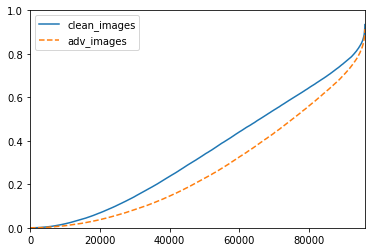

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

content1=sorted(clean_list[:96015], key = lambda x:float(x))
content2=sorted(adv_list[:96015], key = lambda x:float(x))#, reverse=True)

#normalized_1 = [float(i)/sum(content1) for i in content1]
#normalized_2 = [float(j)/sum(content2) for j in content2]

x_axis = np.arange(0, 96015, 1).tolist()
plt.plot(x_axis, content1, label="clean_images",linestyle="-")
plt.plot(x_axis, content2, label="adv_images",linestyle="--")

#plt.xlabel(0, 96020)
#plt.ylabel(0, 10000)

plt.xlim(0, 96000)
plt.ylim(0, 1)

plt.legend()
plt.show()

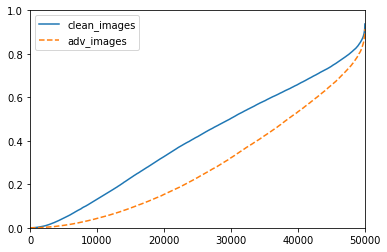

In [47]:
# @@ Cell 359
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

content1=sorted(clean_list, key = lambda x:float(x))
content2=sorted(adv_list, key = lambda x:float(x))#, reverse=True)

#normalized_1 = [float(i)/sum(content1) for i in content1]
#normalized_2 = [float(j)/sum(content2) for j in content2]

x_axis = np.arange(0, len(content1), 1).tolist()
plt.plot(x_axis, content1, label="clean_images",linestyle="-")
plt.plot(x_axis, content2, label="adv_images",linestyle="--")

#plt.xlabel(0, 96020)
#plt.ylabel(0, 10000)

plt.xlim(0, 50000)
plt.ylim(0, 1)

plt.legend()
plt.show()



True vs Adv:
41.92485940429077
True vs propsed:
22.749166840241617


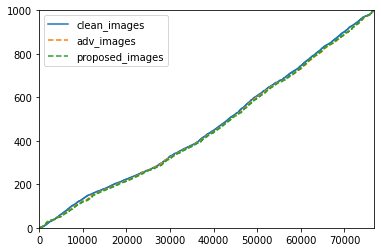

In [271]:
content11=sorted(right_list_f, key = lambda x:float(x))
content22=sorted(adv_list_f, key = lambda x:float(x))#, reverse=True)
content33=sorted(proposed_list_f, key = lambda x:float(x))

tru_adv = 0
tru_proposed = 0
for n,m,w in zip(right_list_f, adv_list_f, proposed_list_f):
    if n == m :
        tru_adv += 1
    if n == w :
        tru_proposed += 1
        
print("True vs Adv:")
print((tru_adv/len(content11))*100)
print("True vs propsed:")
print((tru_proposed/len(content11))*100)

x_axis = np.arange(0, len(content11), 1).tolist()
plt.plot(x_axis, content11, label="clean_images",linestyle="-")
plt.plot(x_axis, content22, label="adv_images",linestyle="--")
plt.plot(x_axis, content33, label="proposed_images",linestyle="--")

#plt.xlabel(0, 96020)
#plt.ylabel(0, 10000)

plt.xlim(0, len(content11))
plt.ylim(0, 1000)

plt.legend()
plt.show()

In [279]:
tru_adv = 0
tru_proposed = 0
adv_proposed = 0
for n,m,w in zip(right_list_f, adv_list_f, proposed_list_f):
    if n == m :
        tru_adv += 1
    if n == w :
        tru_proposed += 1
    if m == w :
        adv_proposed += 1
        
print("True vs Adv:")
print((tru_adv/len(right_list_f))*100)
print("True vs propsed:")
print((tru_proposed/len(right_list_f))*100)
print("True vs propsed:")
print((adv_proposed/len(right_list_f))*100)

True vs Adv:
41.92485940429077
True vs propsed:
22.749166840241617
True vs propsed:
7.352634867735889


In [282]:
print(adv_proposed)

5648
